In [1]:
import os
import numpy as np
import plotly.graph_objects as go

import gzip
import pickle as pkl

def loadall_results2(path, n_folds):
    result = []
    with gzip.open(  path ,'rb') as f:
        for i in range(n_folds+1):

            try:
                data = pkl.load(f)

                result.append( data ) 
            except EOFError:

                break
    
    return np.array(result)

In [4]:
n_folds = 25
horizon = 9999
context = 'MagicTelescope'
model = 'MLP'


material = {
    #'EEneuralcbpside_v5': {'color': [255, 255, 0], 'label': 'EEneuralcbpside_v5'},  # Red
    'EEneuralcbpside_v6': {'color': [255, 0, 0], 'label': 'EEneuralcbpside_v6'},  # Red
    'ineural6': {'color': [51, 255, 255], 'label':'IneurAL6'},                    # Yellow
    'ineural3': {'color': [0, 0, 255], 'label':'IneurAL3'},                    # Cyan
    'neuronal6': {'color': [255, 0, 255], 'label':'neuronal6'},                  # Magenta
    'neuronal3': {'color': [160, 160, 160], 'label':'neuronal3'},                   # Orange
    'margin': {'color': [160, 160, 160], 'label':'margin'},
    'cesa': {'color': [0, 0, 255], 'label':'cesa'},
}

#  'random':{'color':[204,0,204],'label':'e-greedy'}

fig = go.Figure( )

final_regrets = {}

for agent_name in material.keys():

    color, l_label = material[agent_name]['color'], material[agent_name]['label']
    # print(agent_name)

    r,g,b = color

    try:
        direct = './results/'
        if l_label != 'EEneuralcbpside_v5':
            path = os.path.join(direct, 'case1_{}_{}_{}_{}_{}.pkl.gz'.format(model, context, horizon,n_folds,agent_name) )
        else:
            path = os.path.join(direct, 'case1_MNISTbinary_{}_{}_{}.pkl.gz'.format(horizon,n_folds,agent_name) )
        result = loadall_results2(path, n_folds)
        result = result[1:]
        result = result.astype(np.float32)
        print(result.shape)
    except:
        result = np.zeros((n_folds,horizon))


    final_regrets[l_label] = result[:,-1] 
    
    regret =  np.mean(result,0) 
    xcoords = np.arange(0,horizon,1).tolist()
    std =  np.std( result , 0 )
    upper_regret = regret + std


    fig.add_trace(go.Scatter(x=xcoords, y=regret, line=dict(color='rgb({},{},{})'.format(r,g,b),  dash=  'solid' ), mode='lines',  name=l_label,  showlegend=True )) # 
    fig.add_trace(   go.Scatter( x=xcoords+xcoords[::-1], y=upper_regret.tolist()+regret.tolist()[::-1],  fill='toself', fillcolor='rgba({}, {}, {},0.2)'.format(r,g,b), 
                            line=dict(color='rgba(255,255,255,0)'),   hoverinfo="skip",  showlegend=False )   )


    
fig.update_layout(autosize=False,
                  xaxis_title="Sequence", yaxis_title="Regret and Standard Dev.",  margin=go.layout.Margin( l=0,   r=0,   b=0,    t=0, ),   
                  font=dict(size=20,),
                  legend= dict(yanchor="top",y=0.98,xanchor="left",x=0.1) )

# fig.update_yaxes( type="log" )
# fig.update_xaxes( type="log" )

# fig.update_layout( yaxis=dict(range=[0, 2000] ) )

fig.show()
# fig.write_image("./figures/case1_{}_{}.pdf".format(model, context) )

(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)


In [2]:
n_folds = 25
horizon = 9999
model = 'MLP'


material = {
    #'EEneuralcbpside_v5': {'color': [255, 255, 0], 'label': 'EEneuralcbpside_v5'},  # Red
    'EEneuralcbpside_v6': {'color': [255, 0, 0], 'label': 'EEneuralcbpside_v6'},  # Red
    'ineural6': {'color': [51, 255, 255], 'label':'IneurAL6'},                    # Yellow
    'ineural3': {'color': [0, 0, 255], 'label':'IneurAL3'},                    # Cyan
    'neuronal6': {'color': [255, 0, 255], 'label':'neuronal6'},                  # Magenta
    'neuronal3': {'color': [160, 160, 160], 'label':'neuronal3'},                   # Orange
    'margin': {'color': [160, 160, 160], 'label':'margin'},
    'cesa': {'color': [0, 0, 255], 'label':'cesa'},
}

#  'random':{'color':[204,0,204],'label':'e-greedy'}

fig = go.Figure( )


data_regrets = {}
for data in ['MNISTbinary', 'MagicTelescope', 'adult',  'MNIST', 'FASHION']: #'covertype', 'shuttle',

    if data in ['MNIST', 'FASHION']:
        case = 'case2' 
    elif data in ['covertype', 'shuttle']:
        case = 'game_case_seven'
    else:
        case = 'case1'
        
    final_regrets = {}
    for agent_name in material.keys():

        color, l_label = material[agent_name]['color'], material[agent_name]['label']

        r,g,b = color

        try:
            direct = './results/'
            path = os.path.join(direct, 'case1_{}_{}_{}_{}_{}.pkl.gz'.format(model, data, horizon,n_folds,agent_name) )
            result = loadall_results2(path, n_folds)
            result = result[1:]
            result = result.astype(np.float32)
            print(result.shape)
        except:
            result = np.zeros((n_folds,horizon))


        final_regrets[l_label] = result[:,-1] 
    data_regrets[data] = final_regrets
        



# fig.show()
# fig.write_image("./figures/case1_{}_{}.pdf".format(model, context) )

(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)
(25, 9999)


In [3]:
data_regrets

{'MNISTbinary': {'EEneuralcbpside_v6': array([1210., 1201., 1357., 1351., 1254., 1192., 1199., 1435., 1296.,
         1234., 1274., 1429., 1292., 1274., 1353., 1196., 1164., 1294.,
         1258., 1262., 1257., 1248., 1178., 1281., 1412.], dtype=float32),
  'IneurAL6': array([3749., 4077., 3402., 3628., 3796., 3677., 3647., 3561., 3620.,
         4266., 3551., 3582., 3951., 3857., 3891., 3396., 3935., 3889.,
         3809., 4396., 3509., 3443., 3779., 3680., 4154.], dtype=float32),
  'IneurAL3': array([1461., 1562., 1544., 1535., 1494., 1417., 1676., 2469., 1506.,
         1515., 1514., 1481., 1435., 1492., 1597., 1592., 1434., 1704.,
         1492., 1600., 1473., 1442., 1504., 1571., 1560.], dtype=float32),
  'neuronal6': array([2176., 2183., 2187., 2228., 2238., 2196., 2187., 2162., 2241.,
         2166., 2197., 2181., 2202., 2164., 2154., 2159., 2174., 2192.,
         2173., 2174., 2211., 2202., 2215., 2248., 2137.], dtype=float32),
  'neuronal3': array([1469., 1515., 1503., 1514., 

In [4]:
n_folds = 25
horizon = 9999
context = 'adult'
case = 'case1'

material = { 
            # 'EEneuralcbpside_v2':{'color':[255,0,0],'label': 'EEneuralcbpside_v2'},
            #  'EEneuralcbpside_v3':{'color':[0,255,0],'label': 'EEneuralcbpside_v3'},
             'EEneuralcbpside_v5': {'color': [0, 255, 255], 'label': 'EEneuralcbpside_v5'},
            #  'EEneuralcbpside_v4':{'color':[255,255,0],'label': 'EEneuralcbpside_v4'},
            #  'margin':{'color':[255,128,0],'label': 'Margin'},
            #  'cesa':{'color':[0,255,250],'label': 'Cesa'},
            'ineural6':{'color':[0,0,255],'label':'IneurAL6'},
            'ineural3':{'color':[0,0,155],'label':'IneurAL3'},
            'neuronal6':{'color':[255,0,255],'label':'neuronal6'},
            'neuronal3':{'color':[155,0,155],'label':'neuronal3'}  }

fig = go.Figure()

for agent_name in material.keys():
    color, l_label = material[agent_name]['color'], material[agent_name]['label']
    r, g, b = color

    direct = './results/'
    path = os.path.join(direct, '{}_{}_{}_{}_{}.pkl.gz'.format(case, context, horizon, n_folds, agent_name))
    result = loadall_results2(path, n_folds)
    result = result[1:]
    result = result.astype(np.float32)

    # Plot each realization
    for realization in result:
        xcoords = np.arange(0, horizon, 1).tolist()
        fig.add_trace(go.Scatter(x=xcoords, y=realization, line=dict(color='rgb({},{},{})'.format(r, g, b)), mode='lines', name=l_label, showlegend=False))

    # Add a legend entry for the agent
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', name=l_label, line=dict(color='rgb({},{},{})'.format(r, g, b))))

fig.update_layout(autosize=False,
                  xaxis_title="Sequence",
                  yaxis_title="Regret",
                  margin=go.layout.Margin(l=0, r=0, b=0, t=0),
                  font=dict(size=20),
                  legend=dict(yanchor="top", y=0.98, xanchor="left", x=0.1))

# fig.show()
# fig.write_image("./figures/{}_splitview.pdf".format(case))

FileNotFoundError: [Errno 2] No such file or directory: './results/case1_adult_9999_25_EEneuralcbpside_v5.pkl.gz'

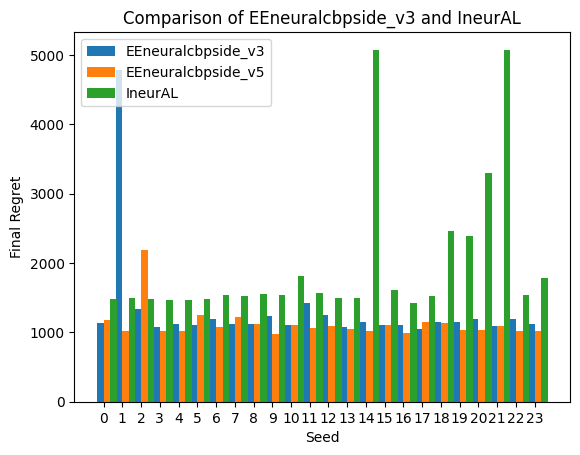

In [6]:
import matplotlib.pyplot as plt
# Creating a barchart

n_folds = 25
horizon = 9999
context = 'MNISTbinary'
case = 'case1'

material = { 
            # 'EEneuralcbpside_v2':{'color':[255,0,0],'label': 'EEneuralcbpside_v2'},
             'EEneuralcbpside_v3':{'color':[0,255,0],'label': 'EEneuralcbpside_v3'},
             'EEneuralcbpside_v5': {'color': [0, 255, 255], 'label': 'EEneuralcbpside_v5'},
            #  'EEneuralcbpside_v4':{'color':[255,255,0],'label': 'EEneuralcbpside_v4'},
            #  'margin':{'color':[255,128,0],'label': 'Margin'},
            #  'cesa':{'color':[0,255,250],'label': 'Cesa'},
             'ineural':{'color':[0,0,255],'label':'IneurAL'},
            'neuronal':{'color':[255,0,255],'label':'neuronal'}  }

final_regrets = {}

# Collect final regrets
for agent_name in material.keys():
    color, l_label = material[agent_name]['color'], material[agent_name]['label']
    direct = './results/'
    path = os.path.join(direct, '{}_{}_{}_{}_{}.pkl.gz'.format(case, context, horizon, n_folds, agent_name))
    result = loadall_results2(path, n_folds)
    result = result[1:]
    result = result.astype(np.float32)

    # Store the final regret of each realization
    final_regrets[l_label] = result[:, -1]



bar_width = 0.35
index = np.arange(len(final_regrets['EEneuralcbpside_v3']))

fig, ax = plt.subplots()
bar1 = ax.bar(index, final_regrets['EEneuralcbpside_v3'], bar_width, label='EEneuralcbpside_v3')
bar2 = ax.bar(index + bar_width, final_regrets['EEneuralcbpside_v5'], bar_width, label='EEneuralcbpside_v5')
bar3 = ax.bar(index + 2* bar_width, final_regrets['IneurAL'], bar_width, label='IneurAL')

ax.set_xlabel('Seed')
ax.set_ylabel('Final Regret')
ax.set_title('Comparison of EEneuralcbpside_v3 and IneurAL')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([str(i) for i in range(len(final_regrets['EEneuralcbpside_v3']))])
ax.legend()

# plt.show()
# plt.savefig('./figures/{}_barchart.pdf'.format(case), dpi=380, bbox_inches='tight')

In [6]:
n_folds = 25
horizon = 9999

context = 'MNIST'
model = 'LeNet'

direct = './results/'
path = os.path.join(direct, 'case1_{}_{}_{}_{}_{}.pkl.gz'.format(model,context,horizon,n_folds,'EEneuralcbpside_v6') )
result = loadall_results2(path, 20)
result

array([[None, None, None, ..., None, None, None]], dtype=object)